#NAME: KIRAN M K
#SEMESTER: 6
#BATCH: B2
#USN: 1BM19CS073


# IMPORTING NECESSARY LIBRARIES

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

#DATA LOADING AND PREPROCESSING

In [2]:
data = load_breast_cancer()

In [3]:
print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
type(data)

sklearn.utils.Bunch

In [8]:
input_data = np.c_[data.data, data.target]
columns = np.append(data.feature_names, ["target"])
df = pd.DataFrame(input_data, columns=columns)

In [9]:
np.unique(df.target)

array([0., 1.])

In [10]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [11]:
new_df = df[['mean radius', 'mean texture','mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean fractal dimension', 'target']]

In [12]:
new_df.head()

,mean radius,mean texture,mean area,mean smoothness,mean compactness,mean concave points,mean fractal dimension,target
0,17.99,10.38,1001.0,0.11840,0.27760,0.14710,0.07871,0.0
1,20.57,17.77,1326.0,0.08474,0.07864,0.07017,0.05667,0.0
2,19.69,21.25,1203.0,0.10960,0.15990,0.12790,0.05999,0.0
3,11.42,20.38,386.1,0.14250,0.28390,0.10520,0.09744,0.0
4,20.29,14.34,1297.0,0.10030,0.13280,0.10430,0.05883,0.0


# RELATION BETWEEN THE ATTRIBUTES

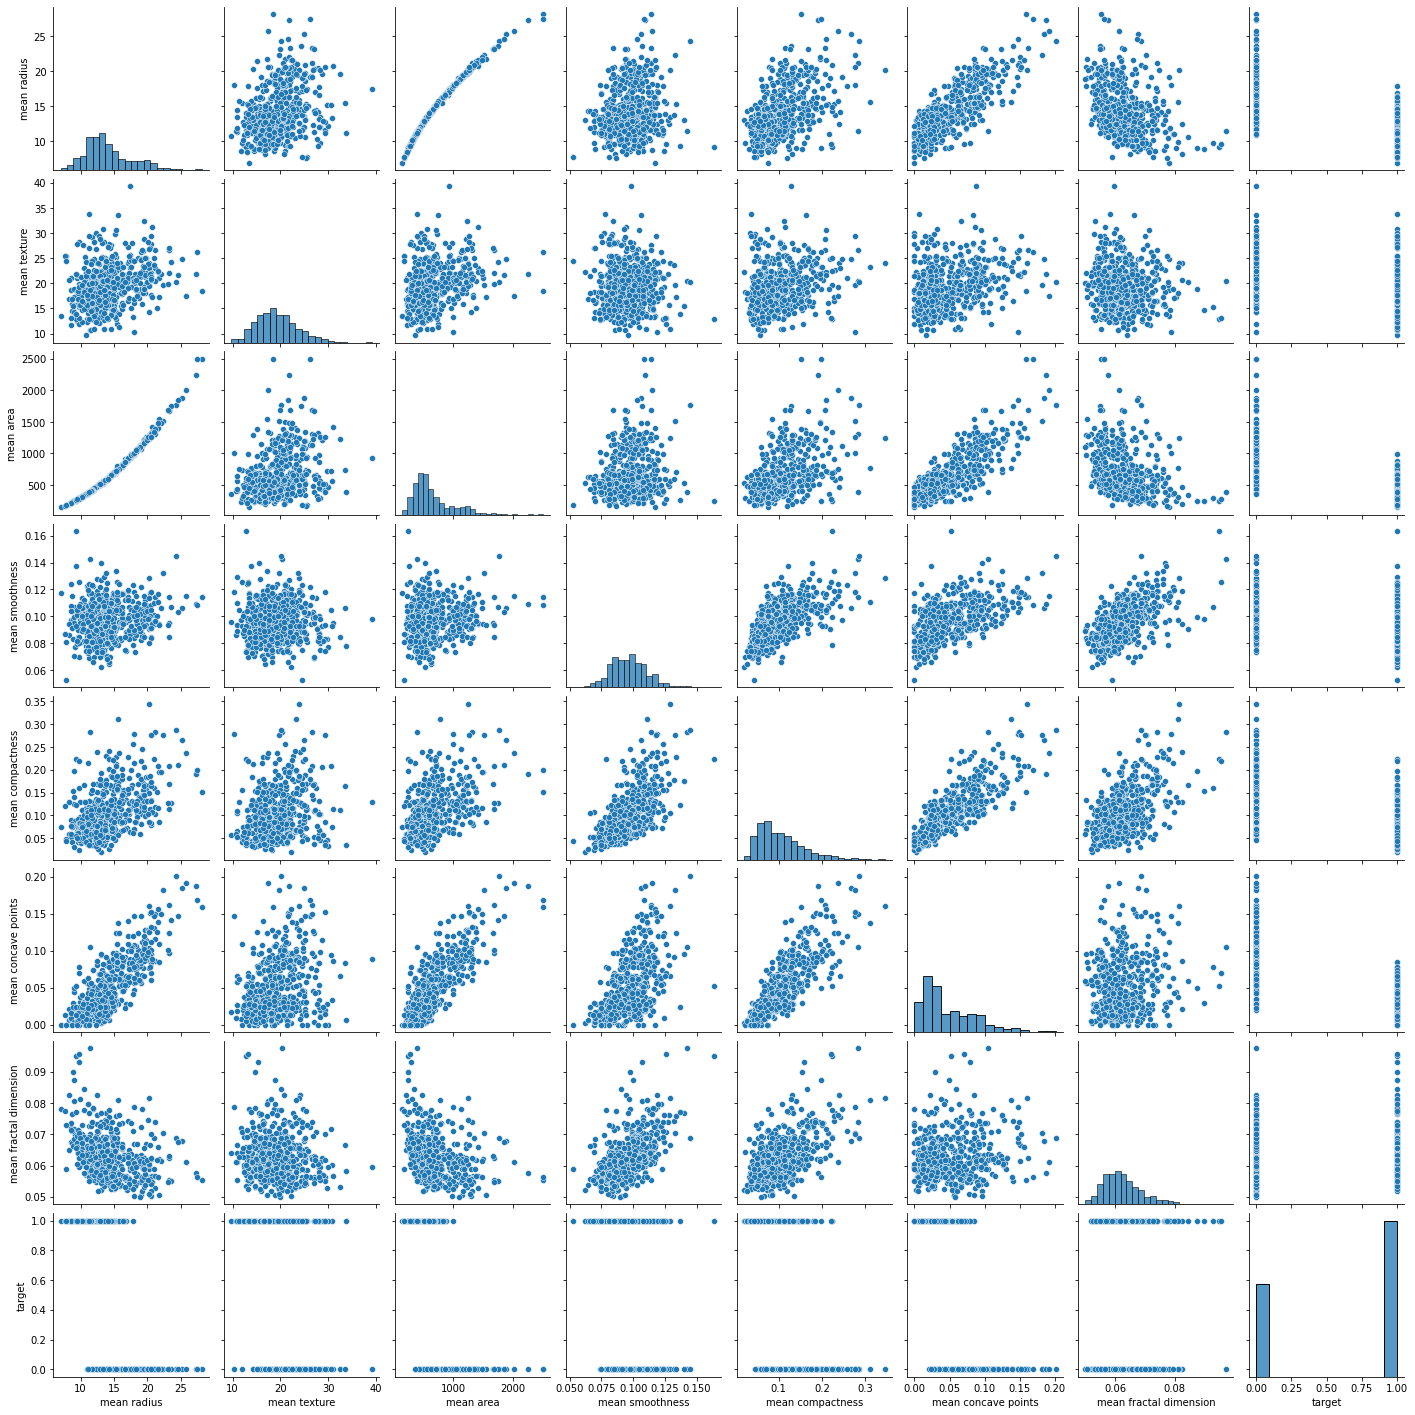

In [13]:
sns.pairplot(new_df)

# CORRELATION BETWEEN THE ATTRIBUTES

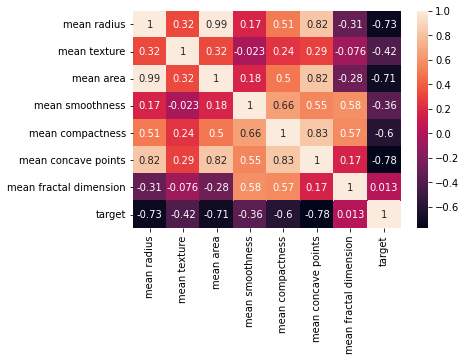

In [14]:
dataplotting = sns.heatmap(new_df.corr(), annot=True)

# CLASSIFIERS EXECUTION

In [15]:
y = new_df.target
X = new_df.drop(['target'], axis='columns')

In [16]:
X.shape, y.shape

((569, 7), (569,))

In [17]:
X = X[:400]
y = y[:400]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.8)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 7), (80, 7), (320,), (80,))

In [20]:
def code_execute(obj):
  obj.fit(X_train, y_train)
  y_pred = obj.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  re = recall_score(y_test, y_pred)
  pr = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  return (acc, pr, re, f1, cm)

# INSTANTIATING OBJECTS OF THE ALGORITHMS

In [21]:
dtc = DecisionTreeClassifier(criterion="entropy")
gnb = GaussianNB()

ad, prd, rd, f1d, cmd = code_execute(dtc)
an, prn, rn, f1n, cmn = code_execute(gnb)

In [22]:
def print_metrics(a, p, r, f, c, name):
  print("Accuracy of "+name+" model is: "+str(a))
  print("Precision of "+name+" model is: "+str(p))
  print("Recall of "+name+" model is: "+str(r))
  print("F1-Score of "+name+" model is: "+str(f))
  cm_disp = ConfusionMatrixDisplay(confusion_matrix = c)
  cm_disp.plot()

# DECISION TREE METRICS 

Accuracy of Decision Tree Classifier model is: 0.9
Precision of Decision Tree Classifier model is: 0.9047619047619048
Recall of Decision Tree Classifier model is: 0.9047619047619048
F1-Score of Decision Tree Classifier model is: 0.9047619047619048


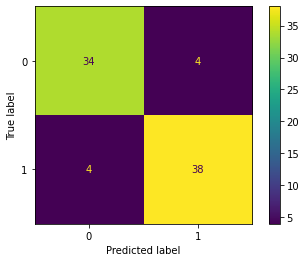

In [23]:
print_metrics(ad, prd, rd, f1d, cmd, "Decision Tree Classifier")

# GAUSSIAN NAIVE BAYES METRICS AFTER CLASSIFICATION

Accuracy of Gaussian Naive Bayes model is: 0.9
Precision of Gaussian Naive Bayes model is: 0.8541666666666666
Recall of Gaussian Naive Bayes model is: 0.9761904761904762
F1-Score of Gaussian Naive Bayes model is: 0.9111111111111111


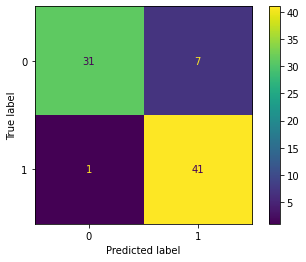

In [24]:
print_metrics(an, prn, rn, f1n, cmn, "Gaussian Naive Bayes")

[Text(0.5294117647058824, 0.9444444444444444, 'mean compactness <= 0.049\nentropy = 0.982\nsamples = 320\nvalue = [135, 185]\nclass = benign'),
 Text(0.23529411764705882, 0.8333333333333334, 'mean perimeter <= 694.5\nentropy = 0.349\nsamples = 183\nvalue = [12, 171]\nclass = benign'),
 Text(0.11764705882352941, 0.7222222222222222, 'mean texture <= 18.105\nentropy = 0.189\nsamples = 173\nvalue = [5, 168]\nclass = benign'),
 Text(0.058823529411764705, 0.6111111111111112, 'entropy = 0.0\nsamples = 107\nvalue = [0, 107]\nclass = benign'),
 Text(0.17647058823529413, 0.6111111111111112, 'mean compactness <= 0.02\nentropy = 0.387\nsamples = 66\nvalue = [5, 61]\nclass = benign'),
 Text(0.11764705882352941, 0.5, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30]\nclass = benign'),
 Text(0.23529411764705882, 0.5, 'mean smoothness <= 0.064\nentropy = 0.581\nsamples = 36\nvalue = [5, 31]\nclass = benign'),
 Text(0.11764705882352941, 0.3888888888888889, 'mean radius <= 11.63\nentropy = 1.0\nsamples = 8\

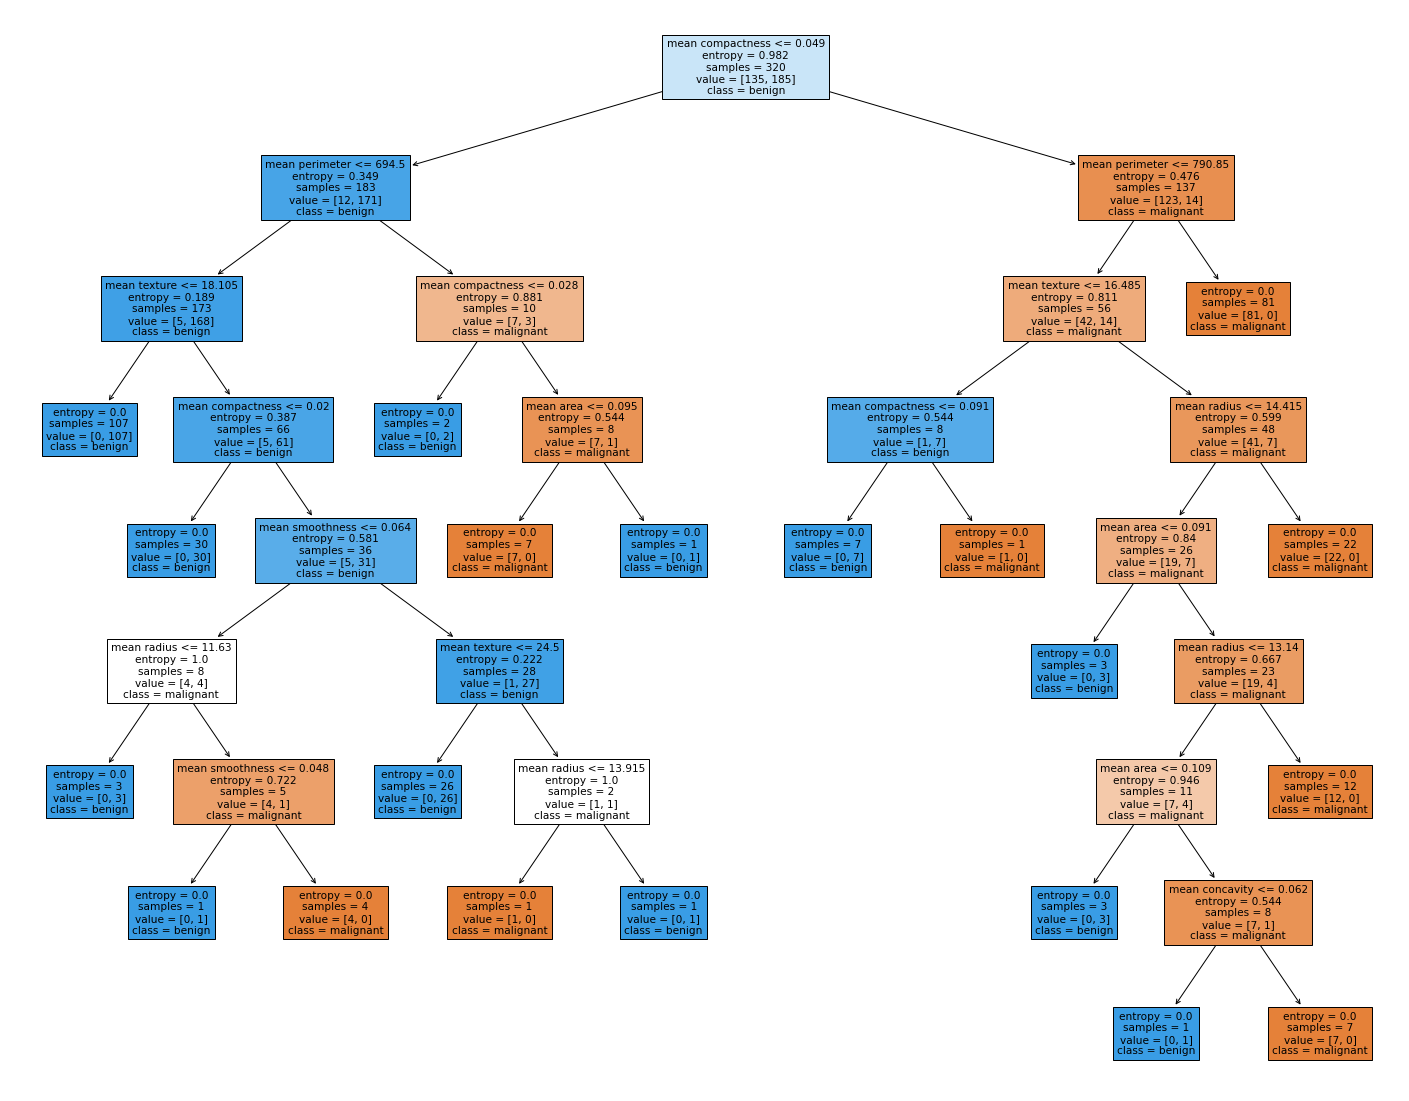

In [27]:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc = dtc.fit(X_train, y_train)
fig = plt.figure(figsize=(25,20))
plot_tree(decision_tree = dtc, feature_names = data.feature_names, class_names = data.target_names, filled=True )

# CONCLUSION: Comparing accuracy: DecisionTree gives : 0.925 and GaussianNaiveBayes gives 0.9, hence DECISION TREE is a better algorithm for the given dataset